# Importing Libraries

In [55]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [56]:
import numpy as np


import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [57]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Testing',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 1311 files belonging to 4 classes.
['glioma', 'meningioma', 'notumor', 'pituitary']


In [58]:
class_name1=[item.replace('___',' | ') for item in class_name]

In [59]:
print(class_name1)

['glioma', 'meningioma', 'notumor', 'pituitary']


Loading Model

In [60]:
cnn = tf.keras.models.load_model('trained_brain_tumor.keras')

Visualising and Performing Prediction on Single image

In [61]:
image_path = 'pi.jpg'

In [62]:
import cv2

In [63]:
from rembg import remove
from PIL import Image, ImageEnhance
from io import BytesIO
import numpy as np

def remove_background(input_path, output_path):
    try:
        # Step 1: Open the image
        with open(input_path, 'rb') as file:
            input_image = file.read()

        # Step 2: Preprocessing - Increase contrast to make the leaf more distinguishable
        pil_image = Image.open(input_path)
        enhancer = ImageEnhance.Contrast(pil_image)
        enhanced_image = enhancer.enhance(1)  # Increase contrast

        # Step 3: Convert the enhanced image to byte array for rembg processing
        img_byte_arr = BytesIO()
        enhanced_image.save(img_byte_arr, format='PNG')
        img_byte_arr = img_byte_arr.getvalue()

        # Step 4: Apply rembg to remove background
        output_image = remove(img_byte_arr)

        # Step 5: Load the output image and convert to RGBA for transparency support
        output_image = Image.open(BytesIO(output_image)).convert("RGBA")

        # Step 6: Create a light purple background
        light_purple = (200, 175, 200, 255) 
        background = Image.new('RGBA', output_image.size, light_purple)

        # Step 7: Combine the output image with the new background
        combined_image = Image.alpha_composite(background, output_image)

        # Step 8: Save the final image
        combined_image.save(output_path, format='PNG')
        print(f"Background removed and replaced with light purple. Output saved as {output_path}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
input_path = image_path
filename = f"1_{input_path}"
remove_background(input_path, filename)


Background removed and replaced with light purple. Output saved as 1_pi.jpg


In [64]:
print(filename)

1_pi.jpg


([], [])

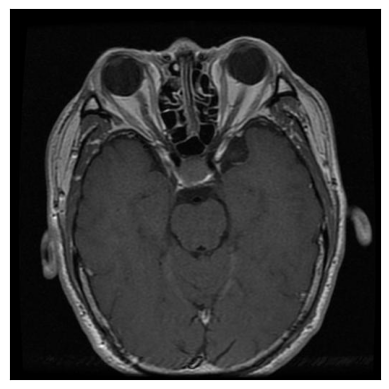

In [65]:
img=cv2.imread(image_path)
plt.imshow(img)

plt.xticks([])
plt.yticks([])

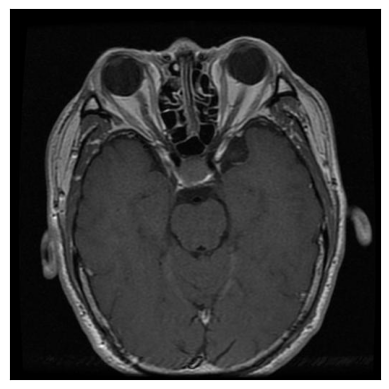

In [66]:


img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
plt.imshow(img)

plt.xticks([])
plt.yticks([])
plt.show()

Testing Model

In [67]:
print(filename)

1_pi.jpg


In [68]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


In [69]:
print(predictions)

[[1.8560665e-09 1.2609614e-03 2.1486359e-05 9.9871767e-01]]


In [70]:
print(image)

<PIL.Image.Image image mode=RGB size=128x128 at 0x1CA80162300>


In [71]:
result_index = np.argmax(predictions) 
print(result_index)

3


In [72]:
model_prediction = class_name1[result_index]
print("result :  tumor")
print("result : ",model_prediction)

result :  tumor
result :  pituitary
